# Introduction

This project is performing statistical analysis on the correlation between music taste and mental health. Machine learning algorithm is also implemented to perform multivariate regression task.

Dataset used: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocessing

## 1. Loading data and Understanding the dataset

In [2]:
# load data into pandas dataframe
df=pd.read_csv('mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Since we are trying to analyze the correlation between music taste and mental health, irrelevant variables such as 'Timestamp', 'Primary streaming service' and 'Permissions' are removed. 'Music effects' is also removed since we are not doing a classification of whether music taste improve mental health. 

In [3]:
# removing irrelevant variables
df = df.drop(df.columns[[0, 2, 31, 32]], axis=1)

## 2. Converting nominal data to numerical

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Hours per day                 736 non-null    float64
 2   While working                 733 non-null    object 
 3   Instrumentalist               732 non-null    object 
 4   Composer                      735 non-null    object 
 5   Fav genre                     736 non-null    object 
 6   Exploratory                   736 non-null    object 
 7   Foreign languages             732 non-null    object 
 8   BPM                           629 non-null    float64
 9   Frequency [Classical]         736 non-null    object 
 10  Frequency [Country]           736 non-null    object 
 11  Frequency [EDM]               736 non-null    object 
 12  Frequency [Folk]              736 non-null    object 
 13  Frequ

In [5]:
df['While working']=df['While working'].replace({'Yes':1,'No':2})
df['Instrumentalist']=df['Instrumentalist'].replace({'Yes':1,'No':2})
df['Composer']=df['Composer'].replace({'Yes':1,'No':2})
df['Fav genre']=df['Fav genre'].replace({'Classical':1,'Country':2,'EDM':3,'Folk':4,'Gospel':5,'Hip hop':6,'Jazz':7, 'K pop':8,'Latin':9, 'Lofi':10, 'Metal':11, 'Pop':12, 'R&B':13, 'Rap':14, 'Rock':15, 'Video game music':16})
df['Exploratory']=df['Exploratory'].replace({'Yes':1,'No':2})
df['Foreign languages']=df['Foreign languages'].replace({'Yes':1,'No':2})
df['Frequency [Classical]']=df['Frequency [Classical]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Country]']=df['Frequency [Country]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [EDM]']=df['Frequency [EDM]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Folk]']=df['Frequency [Folk]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Gospel]']=df['Frequency [Gospel]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Hip hop]']=df['Frequency [Hip hop]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Jazz]']=df['Frequency [Jazz]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [K pop]']=df['Frequency [K pop]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Latin]']=df['Frequency [Latin]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Lofi]']=df['Frequency [Lofi]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Metal]']=df['Frequency [Metal]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Pop]']=df['Frequency [Pop]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [R&B]']=df['Frequency [R&B]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Rap]']=df['Frequency [Rap]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Rock]']=df['Frequency [Rock]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})
df['Frequency [Video game music]']=df['Frequency [Video game music]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4})

## 3. Checking the completeness of dataset

In [6]:
# Checking if there are any missing values in the dataset 
print(df.isnull().sum())

Age                               1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                        0
Insomnia                    

In [7]:
# There are too many missing values for BPM
# Hence, we will be replacing it with the most common BPM in the dataset
print("Most common BPM: \n", df['BPM'].mode())

Most common BPM: 
 0    120.0
dtype: float64


In [8]:
df['BPM'] = df['BPM'].fillna(120)

# Other rows with missing values will be remove
df = df.dropna()

In [9]:
#drop value of BPM that is out of bounds 
df = df[(df['BPM']>=20) & (df['BPM']<=500)]

In [10]:
# Check statistics
df.describe()

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,...,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000,719.000000
mean,25.116829,3.570306,1.207232,1.680111,1.827538,10.458971,1.286509,1.449235,123.152990,2.325452,...,2.219750,3.048679,2.264256,2.346314,3.083449,2.247566,5.82128,4.781641,3.698887,2.617524
std,11.884436,3.013499,0.405606,0.466758,0.378044,4.821687,0.452445,0.497763,29.931099,0.987276,...,1.132748,0.921196,1.056741,1.052102,1.028150,1.072532,2.79257,3.021791,3.069996,2.839318
min,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000,1.000000,2.000000,6.500000,1.000000,1.000000,105.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,4.00000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.000000,2.000000,2.000000,12.000000,1.000000,1.000000,120.000000,2.000000,...,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,6.00000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,1.000000,2.000000,2.000000,15.000000,2.000000,2.000000,140.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,8.00000,7.000000,6.000000,4.000000
max,89.000000,24.000000,2.000000,2.000000,2.000000,16.000000,2.000000,2.000000,220.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.00000,10.000000,10.000000,10.000000


In [11]:
# Final number of rows and columns after data preprocessing
rows = df.shape[0]
cols = df.shape[1]
print("Rows: ", rows)
print("Columns: ", cols)

Rows:  719
Columns:  29


## 4. Visualizing correlation of variables using heatmap

<AxesSubplot:>

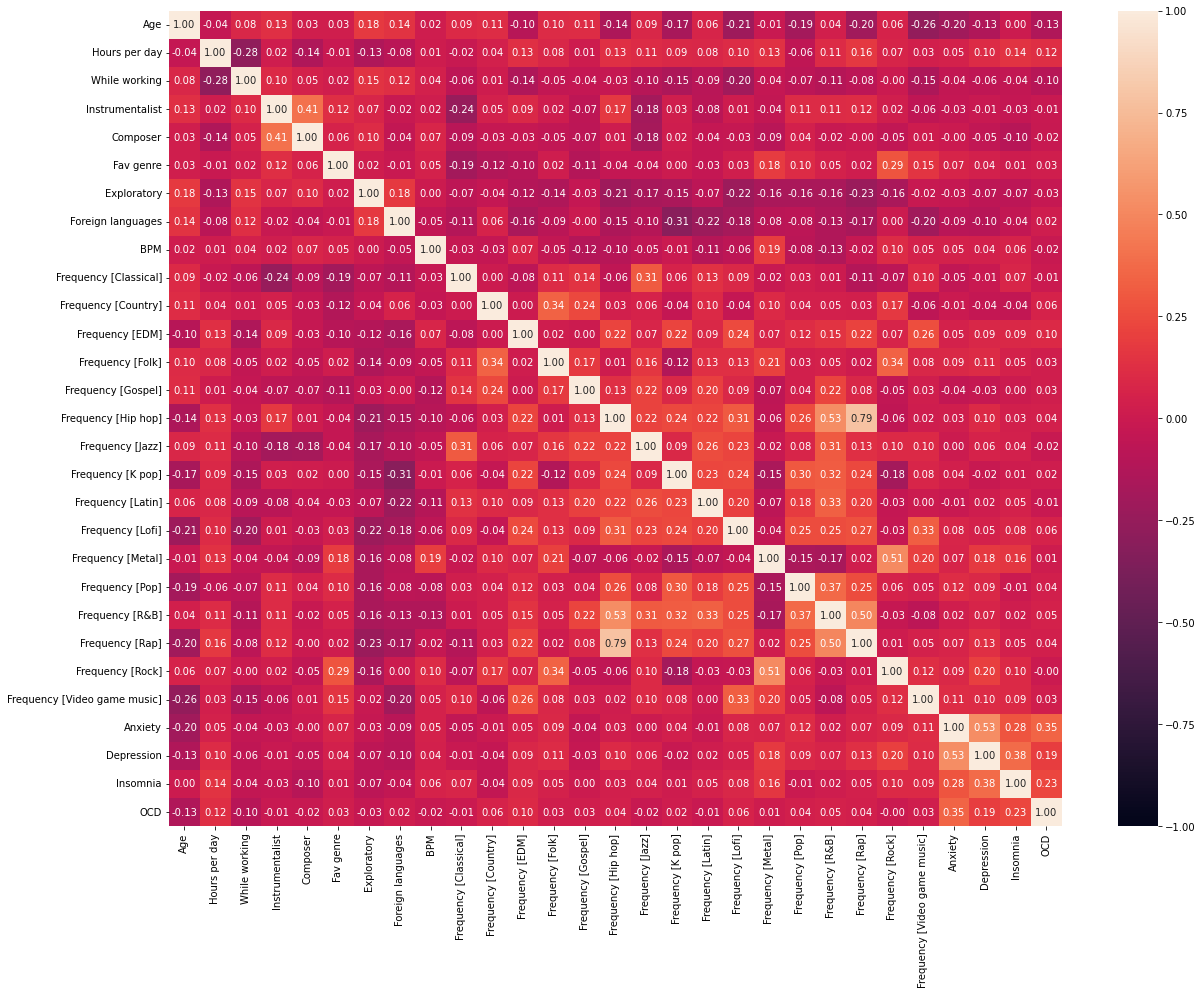

In [12]:
plt.figure(figsize = (20, 15))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

- Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables are highly correlated. 
- Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables are moderately correlated.

From the heatmap plotted above, we can see that overall the variables are not highly correlated. Multicollinearity shown.

In [13]:
# Split into independent and dependent variable
X = df.iloc[:, :25]
y = df.iloc[:, 25: ]

In [15]:
# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

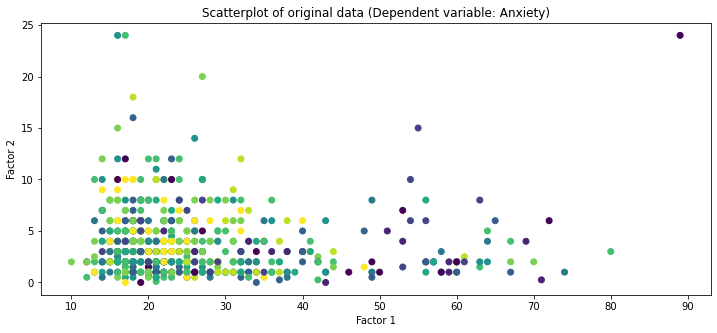

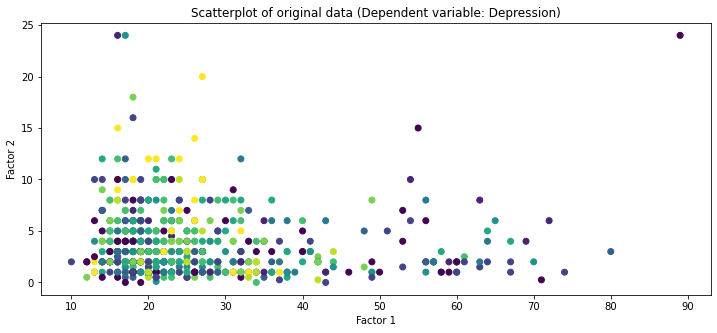

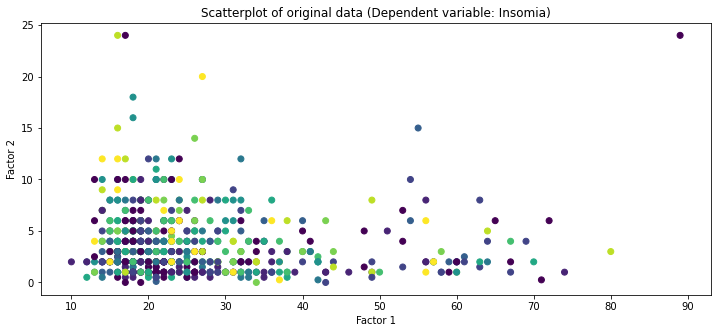

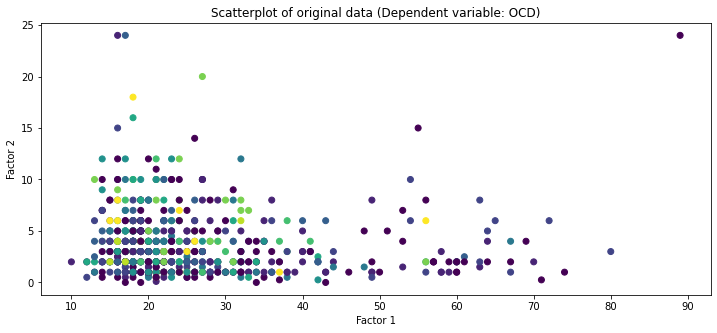

In [17]:
# dependent variable name
mental_health = ['Anxiety', 'Depression', 'Insomia', 'OCD']

# Scatterplot showing relationship between two independent varaible
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values[:, i])
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.title(f'Scatterplot of original data (Dependent variable: {mental_health[i]})')
    plt.show()

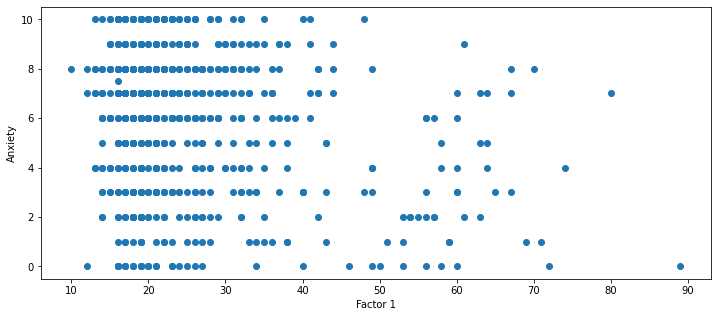

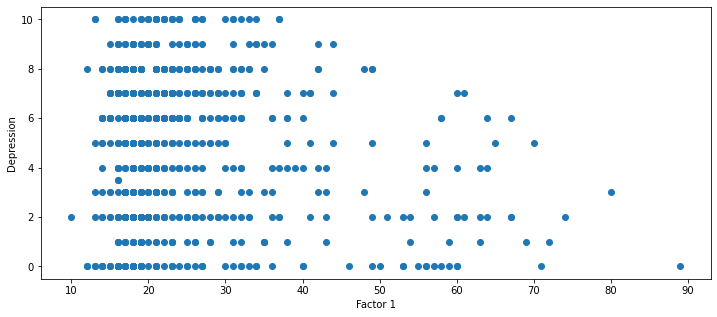

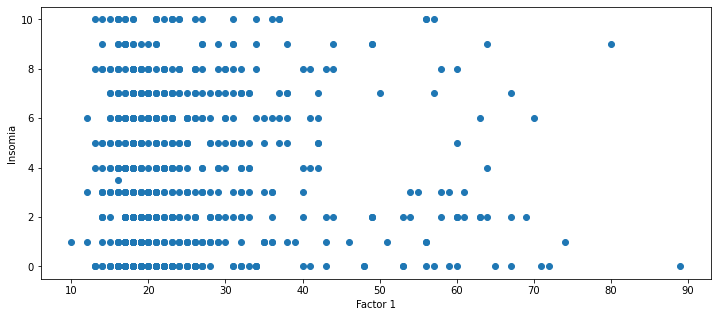

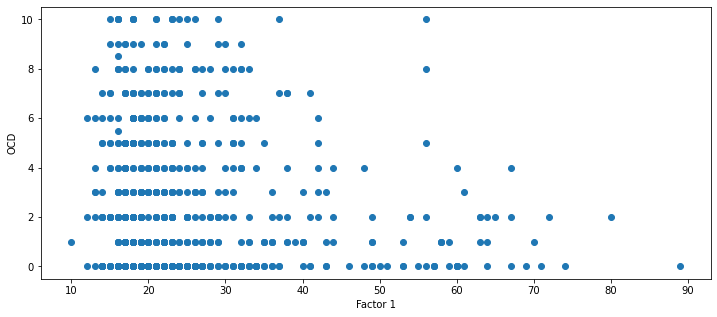

In [18]:
# Scatterplot showing relationship between one independent variable and the dependent variable
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.scatter(X.values[:, 0], y.values[:, i])
    plt.xlabel('Factor 1')
    plt.ylabel(mental_health[i])
    plt.show()

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

From the scatterplots, we can interpret that the variables does not have a linear relationship.

# Exploratory Factor Analysis (EFA)

In [20]:
# Calculate the Kaiser-Meyer-Olkin (KMO) test of sampling adequacy
kmo_all, kmo_model = calculate_kmo(X_scaled)
print('KMO Model Score: ', kmo_model)

if kmo_model > 0.5:
    print("Since kmo model score is more than 0.5, dataset is adequate for factor analysis")

KMO Model Score:  0.7035573780586587
Since kmo model score is more than 0.5, dataset is adequate for factor analysis


In [21]:
# Calculate the Bartlett's test of sphericity
chi_square, p_value = calculate_bartlett_sphericity(X_scaled)
print("-- Bartlett's test of sphericity --")
print("P-value:", p_value)

if p_value < 0.05:
    print("Since p-value is smaller than 0.05, the correlation matrix is suitable for factor analysis")

-- Bartlett's test of sphericity --
P-value: 0.0
Since p-value is smaller than 0.05, the correlation matrix is suitable for factor analysis


In [22]:
# Compute the correlation matrix
corr = np.corrcoef(X_scaled, rowvar = False)

In [23]:
# Perform factor analysis
n_factors = X_scaled.shape[1]
fa = FactorAnalyzer(n_factors, rotation=None)
fa.fit(corr)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [24]:
# Kaiser-Guttman rule
ev, v = fa.get_eigenvalues()
idx = np.where(ev > 1)[0]

# recommended number of factors to retain based on the Kaiser-Guttman rule.
n_factors_kg = idx.size
print(f"Number of factors(Kaiser-Guttman rule): {n_factors_kg}")

Number of factors(Kaiser-Guttman rule): 6


In [25]:
# Varimax rotation 
fa = FactorAnalyzer(n_factors_kg, rotation='varimax')
fa.fit(corr)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [26]:
# Get the factor loadings
loadings = fa.loadings_
l_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6'])
l_df.index = ['Age', 'Hours per day', 'While working', 'Instrumentalist', ' Composer', 'Fav genre', 'Exploratory',
              'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
             'Frequency [Gospel]', ' Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
             'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
             'Frequency [Video game music]']
l_df

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
Age,-0.195068,-0.653409,0.060875,-0.106900,0.204295,-0.129290
Hours per day,0.060798,0.286783,0.162281,0.017917,0.098493,0.502741
While working,-0.177746,-0.526898,-0.230622,0.027163,-0.124011,-0.218038
Instrumentalist,0.110082,-0.068496,-0.854584,-0.017680,-0.000515,-0.054829
Composer,-0.063215,-0.016062,-0.682061,-0.108165,-0.113642,-0.324753
Fav genre,-0.024350,-0.000698,-0.189263,0.721190,-0.213764,-0.183672
Exploratory,-0.401255,-0.488103,-0.185921,-0.215997,-0.252090,-0.297968
Foreign languages,-0.284726,-0.661778,-0.078329,-0.002770,-0.065765,-0.033872
BPM,-0.472490,0.046965,-0.123098,0.171080,-0.175440,0.128372
Frequency [Classical],-0.040082,0.119501,0.670207,-0.278586,0.107462,-0.247263


- Factor 1 has high factor loadings for Hip Hop, Pop, R&B and Rap
- Factor 2 has high factor loadings for Lofi and Video game music
- Factor 3 has high factor loadings for Insturmentalist, Classical and Jazz
- Factor 4 has high factor loadings for Metal and Rock
- Factor 5 has high factor loadings for Country and Folk
- Factor 6 has a relatively higher factor loadings for Hours per day

In [27]:
# Get variance of each factors
var = fa.get_factor_variance()
v_df = pd.DataFrame(var, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6'])
v_df.index = ['Variance', 'Proportional variance', 'Cumulative variance']
v_df

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
Variance,4.346086,3.788640,2.665674,2.106777,1.900358,1.325346
Proportional variance,0.173843,0.151546,0.106627,0.084271,0.076014,0.053014
Cumulative variance,0.173843,0.325389,0.432016,0.516287,0.592301,0.645315


65% of cumulative variance is explained by the 6 factors derived from EFA.

In [28]:
# Extract the communalities
communalities = fa.get_communalities()
print('Communalities:', communalities)

Communalities: [0.53858037 0.37504639 0.42605867 0.75044213 0.59954015 0.63595966
 0.632806   0.53063482 0.3171331  0.61536129 0.54745391 0.55223117
 0.7699673  0.4885803  0.87833542 0.67059328 0.68393127 0.55110808
 0.73171266 0.83307599 0.60880566 0.92203875 0.88171371 0.88903811
 0.70273388]


Communalities value range from 0.3 to 0.9, this indicates that only partial of the observed variables can be explained by the 6 extracted factors and not every variable is well represented by the 6 factors.

In [29]:
# Use the 6 extracted factors as the independent variables for the latter model
EFA_X = fa.transform(X_scaled)

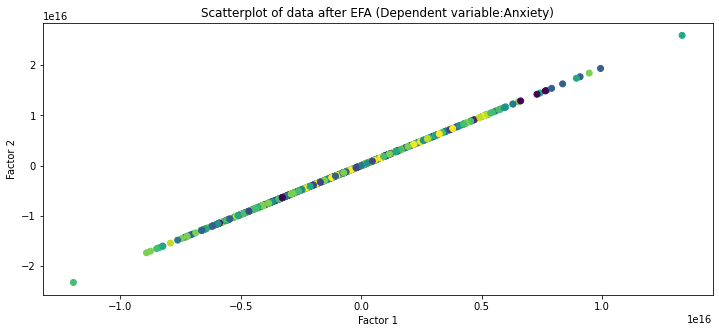

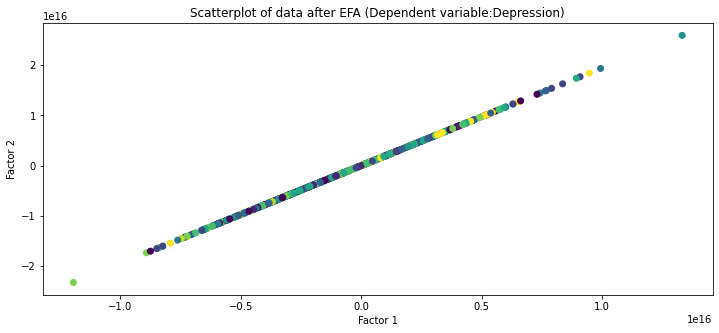

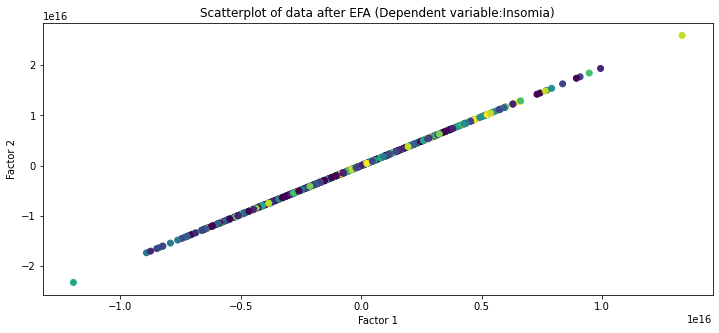

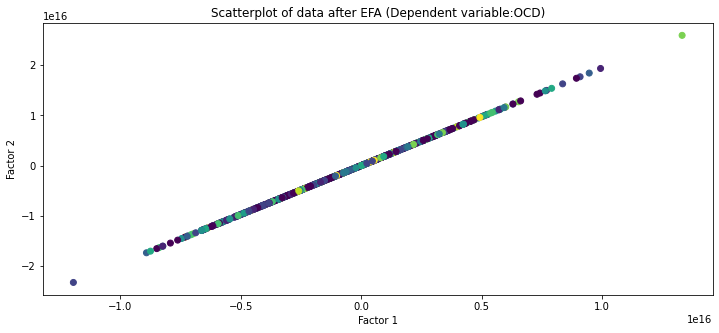

In [30]:
# Scatterplot
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.scatter(EFA_X[:, 0], EFA_X[:, 1], c=y.values[:, i])
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.title(f'Scatterplot of data after EFA (Dependent variable:{mental_health[i]})')
    plt.show()

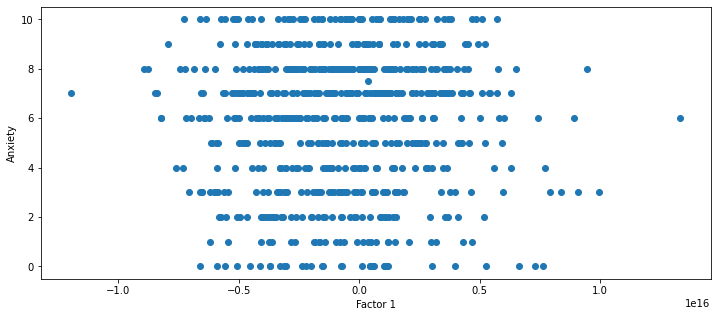

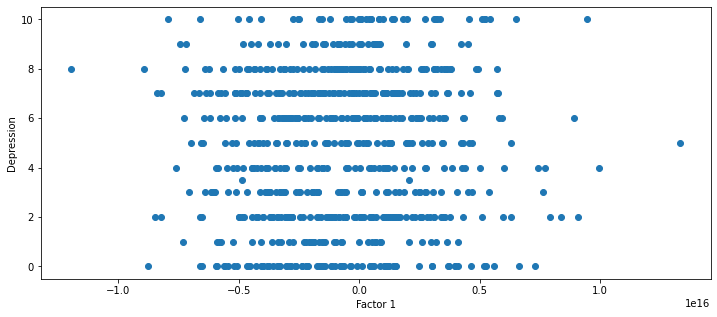

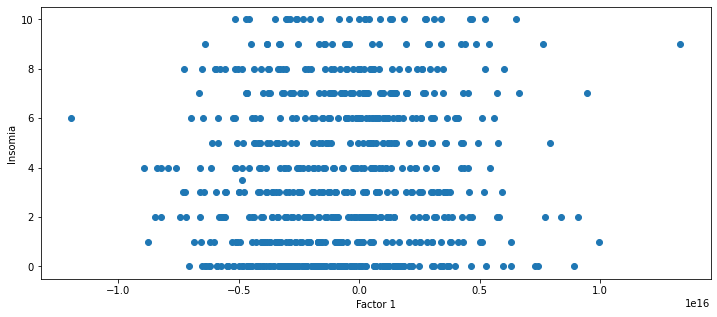

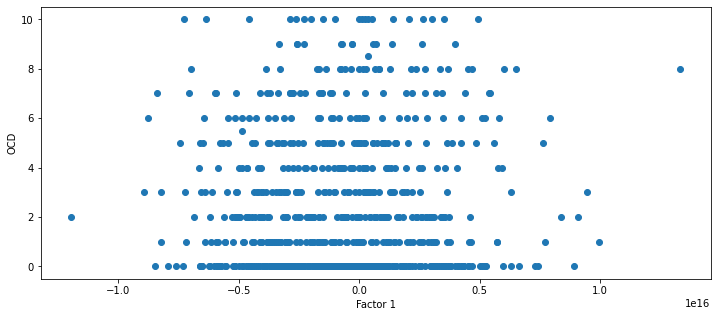

In [31]:
# Scatterplot showing relationship between one independent variable and the dependent variable
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.scatter(EFA_X[:, 0], y.values[:, i])
    plt.xlabel('Factor 1')
    plt.ylabel(mental_health[i])
    plt.show()

In [32]:
# Split the EFA transformed data into training and testing sets
EFA_X_train, EFA_X_test, y_train, y_test = train_test_split(EFA_X, y, test_size=0.3, random_state=42)

# Multiple Linear Regression


In [33]:
# Using original scaled data
LR = LinearRegression()

LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
print('MSE: ', mean_squared_error(y_test, LR_pred))
print('MAE: ', mean_absolute_error(y_test, LR_pred))

MSE:  8.76119262626862
MAE:  2.4478679303163076


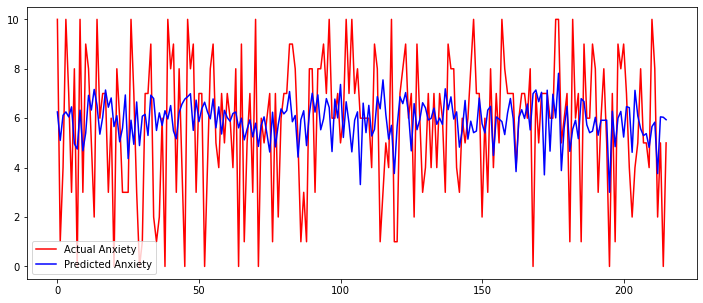

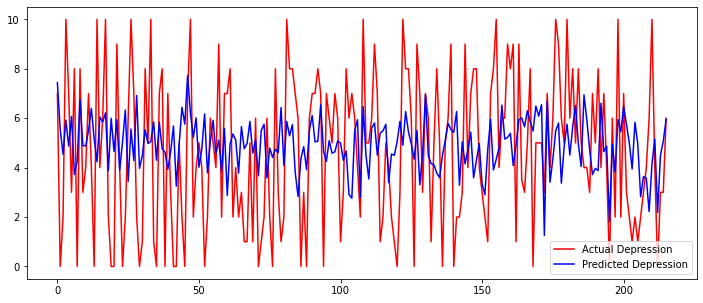

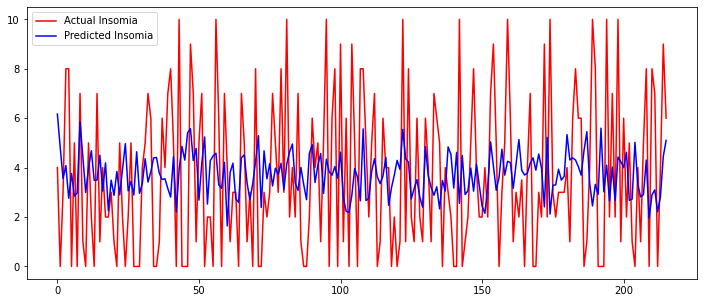

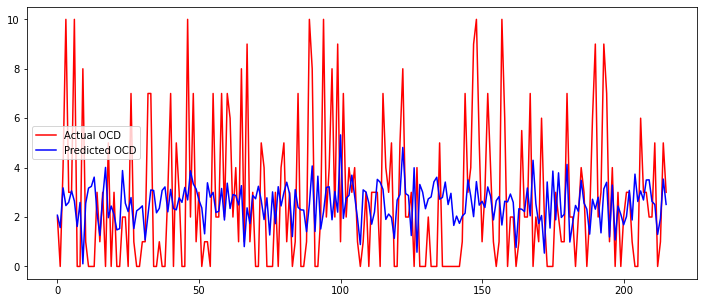

In [35]:
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.plot(y_test.values[:, i], label='Actual '+ mental_health[i], color = 'red')
    plt.plot(LR_pred[:, i], label='Predicted ' + mental_health[i], color = 'blue')
    plt.legend()
    plt.show()

In [36]:
# Using EFA transformed data 
EFA_LR = LinearRegression()
EFA_LR.fit(EFA_X_train, y_train)

EFA_LR_pred = EFA_LR.predict(EFA_X_test)
print('MSE: ', mean_squared_error(y_test, EFA_LR_pred))
print('MAE: ', mean_absolute_error(y_test, EFA_LR_pred))

MSE:  8.683984351529551
MAE:  2.4576637467526643


# Ridge Regression

In [37]:
lambda_values = np.logspace(-4, 4, 100)

In [38]:
ridge = RidgeCV(alphas=lambda_values, cv=10, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=10, scoring='neg_mean_squared_error')

In [39]:
# Fit a Ridge Regression model with the optimal lambda value
ridge_optimal = Ridge(alpha=ridge.alpha_)

In [40]:
ridge_optimal.fit(X_train, y_train)

# Make predictions on the test set
ridge_pred = ridge_optimal.predict(X_test)

# Print the mean squared error and R^2 score
print("MSE:", mean_squared_error(y_test, ridge_pred))
print('MAE: ', mean_absolute_error(y_test, ridge_pred))
print("R^2 score:", r2_score(y_test, ridge_pred))

MSE: 8.394444871975153
MAE:  2.419764153890349
R^2 score: 0.02385170031827269


The MSE and MAE value slightly improve compared to the result in Linear Regression. This might be due to Ridge Regression abilty to handle multicollinearity in the dataset. The result is still consider bad with value of R-squared score 0.0238 indicating that the model does not fit well to the data.

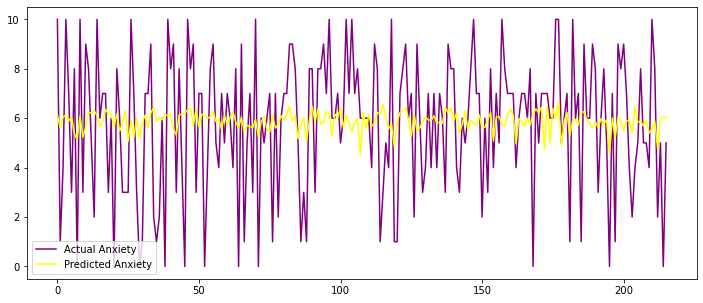

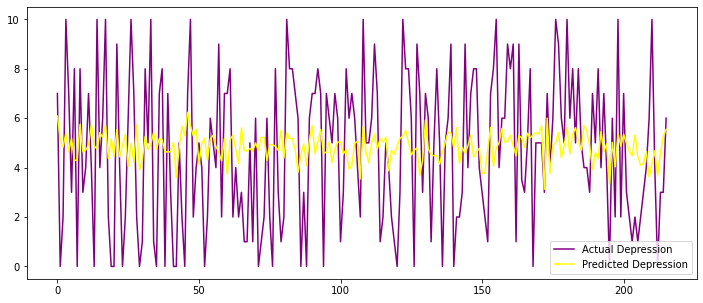

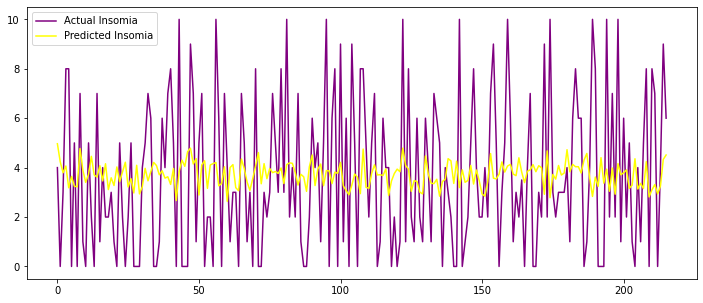

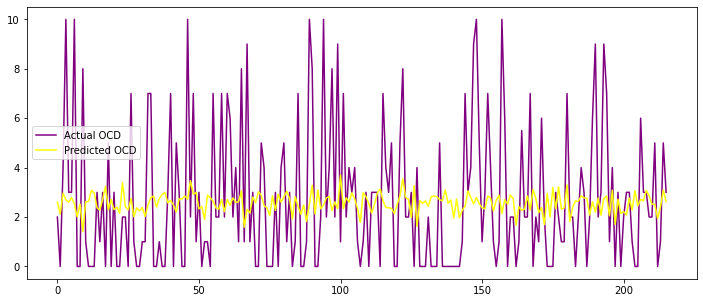

In [41]:
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.plot(y_test.values[:, i], label='Actual '+ mental_health[i], color = 'purple')
    plt.plot(ridge_pred[:, i], label='Predicted ' + mental_health[i], color = 'yellow')
    plt.legend()
    plt.show()

As the dataset are non-linear and exhibits multicollinearity, it is expected that the results are bad from Multiple Linear Regression and Ridge Regression since both model assumes that the data has a linear relationship. Hence, we decided to fit the data into Decision Tree and Random Forest as they are known to be non-linear model and immune to multicollinearity. Besides, we also decide to build a Neural Network to perform the regression task to compare the results from each model.

# Decision Tree 

In [42]:
DT_model = DecisionTreeRegressor()

DT_model.fit(X_train, y_train)
DT_pred = DT_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, DT_pred))
print('MAE: ', mean_absolute_error(y_test, DT_pred))

MSE: 16.58767361111111
MAE:  3.2494212962962963


In [43]:
# report function to tell results of the hyperparamter tuning
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} ".format(results["mean_test_score"][candidate])
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [45]:
# Hyperparameter Tuning using Randomized Search
DT_params = {    
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 20),
    'min_samples_leaf': range(1, 10)
}

DT_rand = RandomizedSearchCV(DT_model, DT_params, n_iter=20, n_jobs=-1)
DT_rand.fit(X_train, y_train)
report(DT_rand.cv_results_)

Rank: 1
Mean validation score: -0.003 
Parameters: {'splitter': 'best', 'min_samples_leaf': 4, 'max_depth': 2, 'criterion': 'friedman_mse'}

Rank: 2
Mean validation score: -0.004 
Parameters: {'splitter': 'random', 'min_samples_leaf': 2, 'max_depth': 1, 'criterion': 'friedman_mse'}

Rank: 3
Mean validation score: -0.018 
Parameters: {'splitter': 'random', 'min_samples_leaf': 8, 'max_depth': 1, 'criterion': 'friedman_mse'}



C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan -0.38127706 -0.26553918 -0.02371547 -0.15655261 -0.17052186
         nan -0.39642943         nan -0.22758031 -0.45507489 -0.08987638
 -0.21303566         nan -0.00395565         nan -0.00344092         nan
 -0.01940781 -0.0179192 ]
  warnings.warn(


In [46]:
# Use results of hyperparameter tuning to train model
DT_op = DecisionTreeRegressor(splitter='best', min_samples_leaf=4, max_depth=2, criterion='friedman_mse')

DT_op.fit(X_train, y_train)
DT_op_pred = DT_op.predict(X_test)
print("MSE:", mean_squared_error(y_test, DT_op_pred))
print('MAE: ', mean_absolute_error(y_test, DT_op_pred))

MSE: 8.284762336169107
MAE:  2.3944062469560645


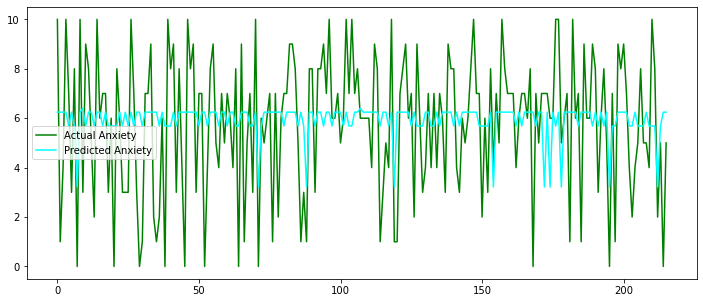

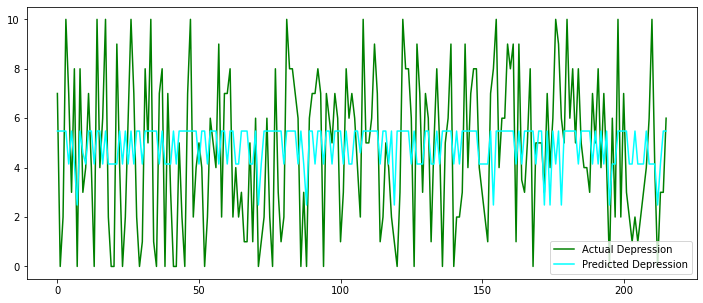

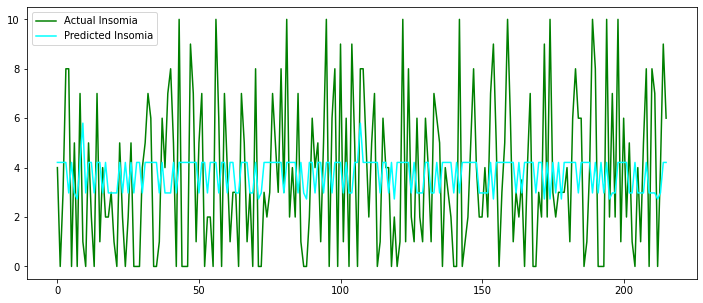

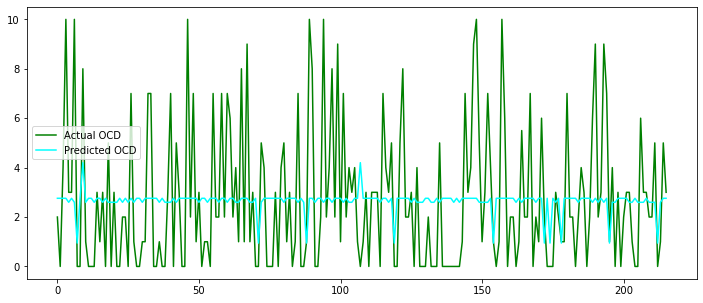

In [47]:
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.plot(y_test.values[:, i], label='Actual '+ mental_health[i], color = 'green')
    plt.plot(DT_op_pred[:, i], label='Predicted ' + mental_health[i], color = 'cyan')
    plt.legend()
    plt.show()

# Random Forest

In [48]:
RF_model = RandomForestRegressor()

RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, RF_pred))
print('MAE: ', mean_absolute_error(y_test, RF_pred))

MSE: 8.346009114583333
MAE:  2.4213946759259266


In [49]:
RF_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'n_estimators': range(10, 100),
    'max_leaf_nodes': range(0, 20),
    'max_depth': range(1, 20),
    'min_samples_leaf': range(1, 5)
}

RF_rand = RandomizedSearchCV(RF_model, RF_params, n_iter=20, n_jobs=-1)
RF_rand.fit(X_train, y_train)
report(RF_rand.cv_results_)

Rank: 1
Mean validation score: 0.028 
Parameters: {'n_estimators': 26, 'min_samples_leaf': 4, 'max_leaf_nodes': 6, 'max_depth': 12, 'criterion': 'friedman_mse'}

Rank: 2
Mean validation score: 0.027 
Parameters: {'n_estimators': 27, 'min_samples_leaf': 2, 'max_leaf_nodes': 11, 'max_depth': 12, 'criterion': 'friedman_mse'}

Rank: 3
Mean validation score: 0.026 
Parameters: {'n_estimators': 47, 'min_samples_leaf': 4, 'max_leaf_nodes': 8, 'max_depth': 11, 'criterion': 'friedman_mse'}



C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan -0.02663525         nan  0.01778378  0.02195005         nan
  0.023721   -0.01490233  0.02666376         nan -0.01197652 -0.01915875
         nan         nan  0.02636178         nan  0.02803833         nan
         nan         nan]
  warnings.warn(


In [50]:
# Use results of hyperparameter tuning to train model
RF_op = RandomForestRegressor(n_estimators=26, min_samples_leaf=4, max_leaf_nodes=6, max_depth=12, criterion='friedman_mse')

RF_op.fit(X_train, y_train)
RF_op_pred = RF_op.predict(X_test)
print("MSE:", mean_squared_error(y_test, RF_op_pred))
print('MAE: ', mean_absolute_error(y_test, RF_op_pred))

MSE: 8.172126453629929
MAE:  2.3794432144591426


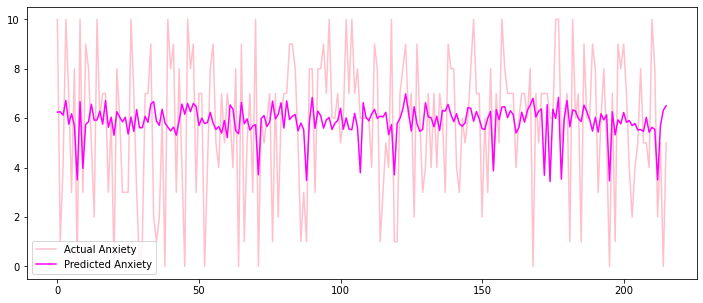

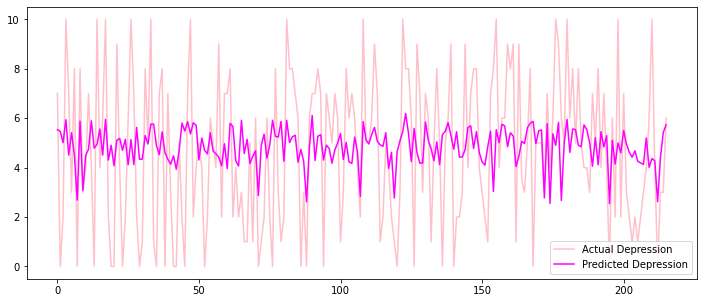

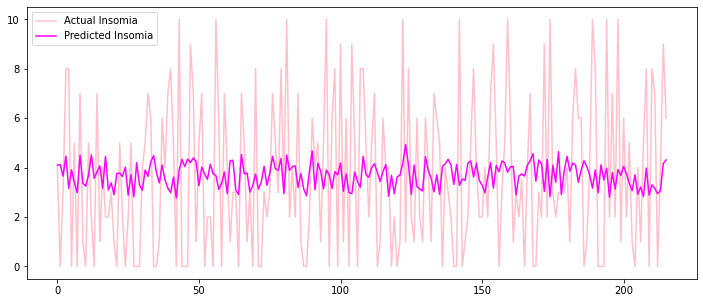

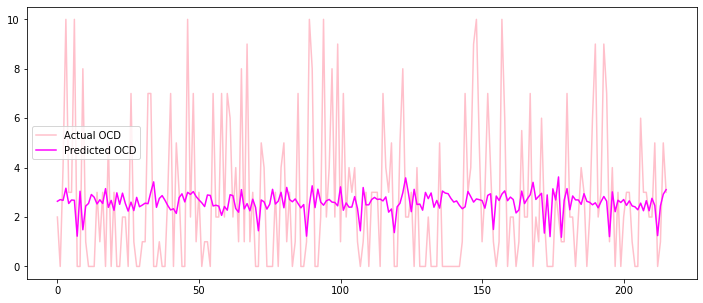

In [51]:
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.plot(y_test.values[:, i], label='Actual '+ mental_health[i], color = 'pink')
    plt.plot(RF_op_pred[:, i], label='Predicted ' + mental_health[i], color = 'magenta')
    plt.legend()
    plt.show()

# Neural Network

In [52]:
# define the model
def get_model(n_inputs, n_outputs, hidden_units1, hidden_units2):
    model = Sequential()
    model.add(Dense(hidden_units1, input_dim=n_inputs, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_units2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    return model

In [56]:
num_inputs = X_scaled.shape[1]
num_outputs = y.shape[1]

In [72]:
nn = get_model(num_inputs, num_outputs, 10, 10)
nn.fit(X_train, y_train, epochs=100, validation_split=0.2)
nn_pred = nn.predict(X_test)

Epoch 1/100
13/13 [==============================] - 0s 7ms/step - loss: 32.1921 - val_loss: 28.7820
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 30.9509 - val_loss: 27.9362
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 30.3255 - val_loss: 27.2301
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 29.2286 - val_loss: 26.6441
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 28.7715 - val_loss: 26.1242
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 28.1562 - val_loss: 25.6231
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 27.5779 - val_loss: 25.1206
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 27.0579 - val_loss: 24.5853
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 26.3673 - val_loss: 24.0033
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 25.7098 - val_los

In [73]:
print("MSE:", mean_squared_error(y_test, nn_pred))
print('MAE: ', mean_absolute_error(y_test, nn_pred))

MSE: 9.091958099718514
MAE:  2.4998800867685564


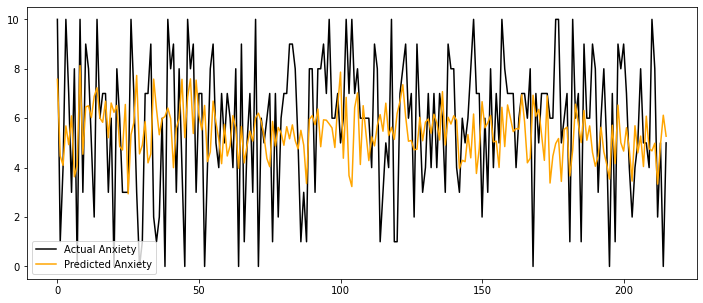

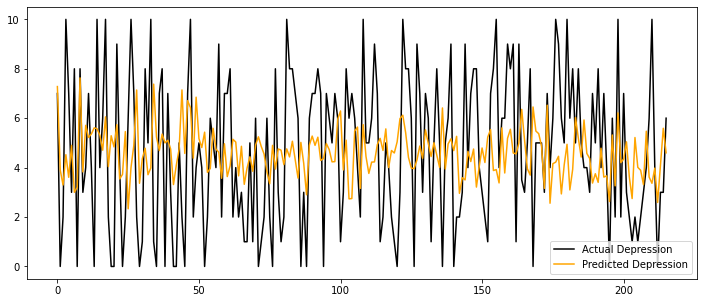

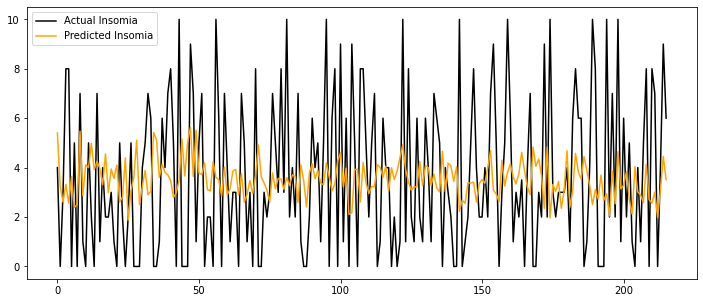

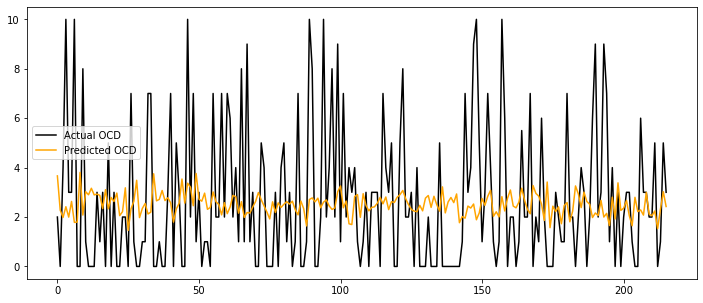

In [74]:
for i in range(4):
    plt.figure(figsize=(12,5))
    plt.plot(y_test.values[:, i], label='Actual '+ mental_health[i], color = 'black')
    plt.plot(nn_pred[:, i], label='Predicted ' + mental_health[i], color = 'orange')
    plt.legend()
    plt.show()

From all the statistical learning model and machine learning model, the MSE and MAE value between the predicted value and actual value are always having a high value. This means that all the model have a hard time to predict a person mental health condition based on their music taste. We can interpret that ones' music taste have a weak correlation with mental health and it is unadvisable to judge ones' mental health from their music taste.